In [1]:
# https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines
# https://docs.sympy.org/latest/modules/geometry/lines.html#sympy.geometry.line.Ray2D

In [2]:
# import sympy and Point, Line 
from sympy import Point, Line, Segment, Ray

In [3]:
d = 1                # толщина мембраны
r = 0.1              # половина размера меньшего отверстия
#alpha = 20/360*2*pi  # образующий угол клина
a = 0.1              # дополнительный размер плоскости мембраны со стороны большего размера отверстия

epsilon = 1e-6

color = "green"

calc_float = True

def draw_wedge(alpha, traj_ray_1):
    plt = Graphics()
    
    p1 = (0, r)
    p2 = (d, (r + d * tan(alpha)).n())
    wedge_segment_upper = Segment(p1, p2)
    plt += line (wedge_segment_upper.points, color = color, linestyle="dashed")
    
    p1 = (0, r)
    p2 = (0, r + d * tan(alpha) + a)
    plt += line ([p1, p2], color = color, linestyle="dashed")
    
    p1 = (d, r + d * tan(alpha))
    p2 = (d, r + d * tan(alpha) + a)
    plt += line ([p1, p2], color = color, linestyle="dashed")
    
    
    
    p1 = (0, -r)
    p2 = (d, (-r - d * tan(alpha)).n())
    wedge_segment_down = Segment(p1, p2)
    plt += line (wedge_segment_down.points, color = color, linestyle="dashed")

    p1 = (0, -r)
    p2 = (0, -r - d * tan(alpha) - a)
    plt += line ([p1, p2], color = color, linestyle="dashed")

    p1 = (d, -r - d * tan(alpha))
    p2 = (d, -r - d * tan(alpha) - a)
    plt += line ([p1, p2], color = color, linestyle="dashed")

    segment_out = Segment((0,r), (0,-r))
    segment_in  = Segment((d, (r + d * tan(alpha)).n()), (d, -(r + d * tan(alpha)).n()))

    def draw_traj(plt, alpha, traj_ray):
        plt.show(aspect_ratio = 1, axes=False)
        
        try:
            intersection_down = traj_ray.intersect(wedge_segment_down)
        except:
            intersection_down = ()
        #print("wedge_segment_down", wedge_segment_down)
        #print("intersection_down", intersection_down)
        if (intersection_down == wedge_segment_down):
            return plt, 1
        elif len(intersection_down) > 0:
            intersection_point_down, = intersection_down

            #if traj_ray.source != intersection_point_down:
            if  abs(traj_ray.source.x - intersection_point_down.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_down.y) > epsilon:

                #print("intersection_point_down", intersection_point_down)
                if calc_float:
                    intersection_point_down = Point(intersection_point_down.x.n(), intersection_point_down.y.n())
                print("intersection_point_down", intersection_point_down)

                plt += arrow(traj_ray.source, intersection_point_down, linestyle="dashed")

                traj_ray_angle_between_wedge_segment_down = traj_ray.angle_between(wedge_segment_down)
                #if calc_float:
                #    traj_ray_angle_between_wedge_segment_down = traj_ray_angle_between_wedge_segment_down.n()

                print("traj_ray.angle_between(wedge_segment_down)", (traj_ray_angle_between_wedge_segment_down/(pi/2)).n())

                down_normal_angle = pi/2-alpha
                print("down_normal_angle", down_normal_angle)

                ray_normal = Ray(intersection_point_down, angle = down_normal_angle)
                print("ray_normal"
                      , ray_normal.points[0].x.n()
                      , ray_normal.points[0].y.n()
                      , ray_normal.points[1].x.n()
                      , ray_normal.points[1].y.n()
                     )

                intersection_normal = ray_normal.intersect(wedge_segment_upper)
                if len(intersection_normal) > 0:
                    intersection_normal_point, = intersection_normal
                    print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                    #intersection_normal_point = Point(intersection_normal_point.x.n(), intersection_normal_point.y.n())
                    #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                    plt += line((ray_normal.source, intersection_normal_point))
                else:
                    intersection_normal = ray_normal.intersect(segment_in)
                    if len(intersection_normal) > 0:
                        intersection_normal_point, = intersection_normal
                        print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                        #intersection_normal_point = Point(intersection_normal_point.x.n(), intersection_normal_point.y.n())
                        #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                        plt += line((ray_normal.source, intersection_normal_point))

                angle_ray_2 = down_normal_angle + (traj_ray_angle_between_wedge_segment_down - pi/2)
                print("angle_ray_2", angle_ray_2.n())
                traj_ray_2 = Ray(intersection_point_down, angle = angle_ray_2)

                return draw_traj(plt, alpha, traj_ray_2)  

        try:
            intersection_upper = traj_ray.intersect(wedge_segment_upper)
        except:
            intersection_upper = ()
        #print("wedge_segment_upper", wedge_segment_upper)
        #print("intersection_upper", intersection_upper)
        if (intersection_upper == wedge_segment_upper):
            return plt, 1
        elif len(intersection_upper) > 0:
            intersection_point_upper, = intersection_upper
            
            # if traj_ray.source != intersection_point_upper:
            if  abs(traj_ray.source.x - intersection_point_upper.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_upper.y) > epsilon:

                #print("intersection_point_upper", intersection_point_upper)
                if calc_float:
                    intersection_point_upper = Point(intersection_point_upper.x.n(), intersection_point_upper.y.n())
                print("intersection_point_upper", intersection_point_upper)
                
                plt += arrow(traj_ray.source, intersection_point_upper, linestyle="dashed")
                
                traj_ray_angle_between_wedge_segment_upper = traj_ray.angle_between(wedge_segment_upper)
                #if calc_float:
                #    traj_ray_angle_between_wedge_segment_upper = traj_ray_angle_between_wedge_segment_upper.n()
                print("traj_ray.angle_between(wedge_segment_upper)", (traj_ray_angle_between_wedge_segment_upper/(pi/2)).n())

                upper_normal_angle = 2*pi-pi/2+alpha
                print("upper_normal_angle", upper_normal_angle)

                ray_normal = Ray(intersection_point_upper, angle = upper_normal_angle)
                print("ray_normal"
                      , ray_normal.points[0].x.n()
                      , ray_normal.points[0].y.n()
                      , ray_normal.points[1].x.n()
                      , ray_normal.points[1].y.n()
                     )

                intersection_normal = ray_normal.intersect(wedge_segment_down)
                if len(intersection_normal) > 0:
                    intersection_normal_point, = intersection_normal
                    #print("intersection_normal_point with wedge_segment_down", intersection_normal_point)
                    #intersection_normal_point = Point(intersection_normal_point.x.n(), intersection_normal_point.y.n())
                    #print("intersection_normal_point with wedge_segment_down", intersection_normal_point)
                    plt += line((ray_normal.source, intersection_normal_point))
                else:
                    intersection_normal = ray_normal.intersect(segment_in)
                    if len(intersection_normal) > 0:
                        intersection_normal_point, = intersection_normal
                        #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                        #intersection_normal_point = Point(intersection_normal_point.x.n(), intersection_normal_point.y.n())
                        #print("intersection_normal_point with wedge_segment_upper", intersection_normal_point)
                        plt += line((ray_normal.source, intersection_normal_point))

                angle_ray_2 = upper_normal_angle - (traj_ray_angle_between_wedge_segment_upper - pi/2)
                print("angle_ray_2", angle_ray_2.n())
                traj_ray_2 = Ray(intersection_point_upper, angle = angle_ray_2)

                return draw_traj(plt, alpha, traj_ray_2)  

        try:
            intersection_in = traj_ray.intersect(segment_in)
        except:
            intersection_in = ()
        #print("segment_in", segment_in)
        #print("intersection_in", intersection_in)
        if intersection_in == segment_in:
            return plt, 0
        elif len(intersection_in) > 0:
            intersection_point_in, = intersection_in
            print("intersection_point_in", intersection_point_in)

            #if traj_ray.source != intersection_point_in:
            if  abs(traj_ray.source.x - intersection_point_in.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_in.y) > epsilon:

                plt += arrow(traj_ray.source, intersection_point_in, linestyle="dashed")
                print("return plt, 0")
                return plt, 0
            else:
                print("traj_ray.source", traj_ray.source)
                print("intersection_point_in", intersection_point_in)

        try:
            intersection_out = traj_ray.intersect(segment_out)
        except:
            intersection_out = ()
        #print("segment_out", segment_out)
        #print("intersection_out", intersection_out)
        if len(intersection_out) > 0:
            intersection_point_out, = intersection_out
            print("intersection_point_out", intersection_point_out)

            #if traj_ray.source != intersection_point_out:
            if  abs(traj_ray.source.x - intersection_point_out.x) > epsilon or \
                abs(traj_ray.source.y - intersection_point_out.y) > epsilon:
                
                plt += arrow(traj_ray.source, intersection_point_out, linestyle="dashed")
                print("return plt, 1")
                return plt, 1
            else:
                print("traj_ray.source", traj_ray.source)
                print("intersection_point_out", intersection_point_out)

        #intersection_out_0 = traj_ray.intersection(segment_out.points[0])
        #print("traj_ray", traj_ray)
        #print("segment_out[0]", segment_out.points[0])
        #print("intersection_out_0", intersection_out_0)

        #intersection_out_1 = traj_ray.intersection(segment_out.points[1])
        #print("segment_out[1]", segment_out.points[1])
        #print("intersection_out_1", intersection_out_1)

        return plt, n

    plt, n = draw_traj(plt, alpha, traj_ray_1)  
    #p += text("$\\alpha$", p1, fontsize=14)

    return plt, n

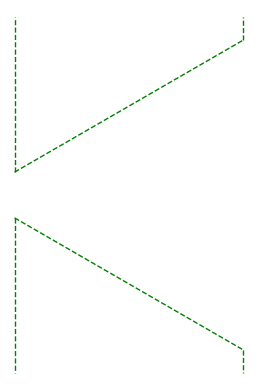

intersection_point_down Point2D(383974596215561/5000000000000000, -72168783648703/500000000000000)
traj_ray.angle_between(wedge_segment_down) 1.33333333333333
down_normal_angle 1/3*pi
ray_normal 0.0767949192431122 -0.144337567297406 1.07679491924311 1.58771324027147
intersection_normal_point with wedge_segment_upper Point2D(92863279495408078159637977539/666666666666666598686313495031 + 721687836487031046058940485093*sqrt(3)/6666666666666665986863134950310, 208333333333333083567585214031703344221622609*sqrt(3)/3333333333333332993431567475155000000000000000 + 60140653040585995148233806503478559559905207/333333333333333299343156747515500000000000000)
angle_ray_2 1.57079632679490


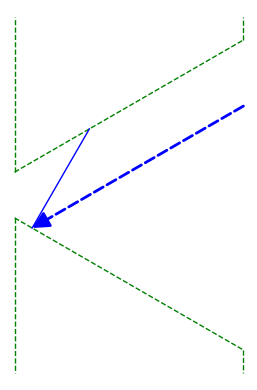

intersection_point_upper Point2D(383974596215561/5000000000000000, 72168783648703/500000000000000)
traj_ray.angle_between(wedge_segment_upper) 0.666666666666666
upper_normal_angle 5/3*pi
ray_normal 0.0767949192431122 0.144337567297406 1.07679491924311 -1.58771324027147
angle_ray_2 5.75958653158129


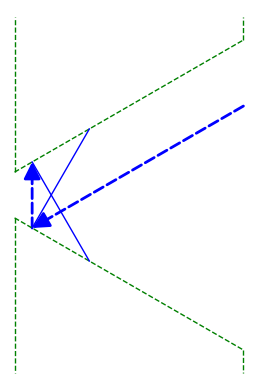

intersection_point_in Point2D(1, (-13848076211353317*sqrt(333333333333332993431567475155000000000000000*sqrt(500000000000000203941059514907 + 288675134594813000000000000000*sqrt(3)) + 192450089729875254836382926833937792295496812000000000000000*sqrt(3) + 333333333333333333333333333333361061303837375225998770145766 + 192450089729875372581808536583031103852251594*sqrt(3)*sqrt(500000000000000203941059514907 + 288675134594813000000000000000*sqrt(3)))/5000000000000000 - 3221687836487034469009897872338296655778377391*sqrt(3)/5000000000000000 + 72168783648703*sqrt(999999999999998980294702425465000000000000000*sqrt(500000000000000203941059514907 + 288675134594813000000000000000*sqrt(3)) + 1000000000000000000000000000000083183911512125677996310437298 + 577350269189625764509148780501813376886490436000000000000000*sqrt(3) + 577350269189626117745425609749093311556754782*sqrt(3)*sqrt(500000000000000203941059514907 + 288675134594813000000000000000*sqrt(3)))/500000000000000 + 219337567297407171464139

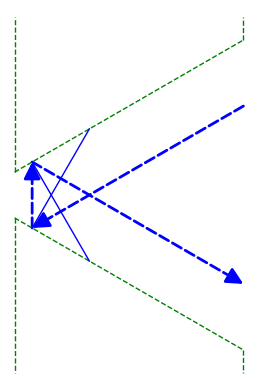

In [4]:
calc_float = True
alpha_=pi/6
p1 = (d,  (r + d * tan(alpha_)/2))
traj_ray_1 = Ray(p1, angle = pi+pi/3/2)
plt, n = draw_wedge(alpha=alpha_, traj_ray_1=traj_ray_1)
plt.show(aspect_ratio = 1, axes=False)

In [5]:
def integrand (alpha, y, ang):
    calc_float = True
    plt, n = draw_wedge(alpha, traj_ray_1 = Ray((d, y), angle = ang))
    plt.show(aspect_ratio = 1, axes=False)
    return n

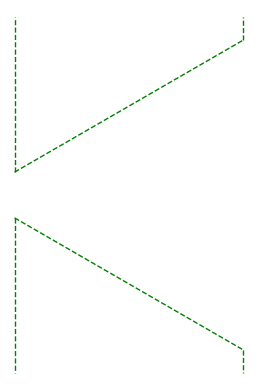

intersection_point_down Point2D(26333870571301/200000000000000, -176019336315727/1000000000000000)
traj_ray.angle_between(wedge_segment_down) 1.53934271219315
down_normal_angle 1/3*pi
ray_normal 0.131669352856505 -0.176019336315727 1.13166935285650 1.55603147125315
intersection_normal_point with wedge_segment_upper Point2D(277183948346470947524384524051/1333333333333333197372626990062 + 176019336315727006427306308565*sqrt(3)/1333333333333333197372626990062, 10162481120446429875957607551618414005294669*sqrt(3)/133333333333333319737262699006200000000000000 + 146682780263105854940149443960870379738347463/666666666666666598686313495031000000000000000)
angle_ray_2 1.89439510239320


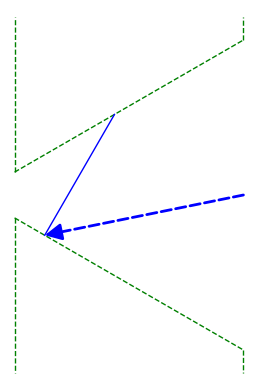

intersection_point_upper Point2D(163767324609849/5000000000000000, 14863777723699/125000000000000)
traj_ray.angle_between(wedge_segment_upper) 0.872676045526483
upper_normal_angle 5/3*pi
ray_normal 0.0327534649219698 0.118910221789592 1.03275346492197 -1.61314058577929
angle_ray_2 5.43598775598299


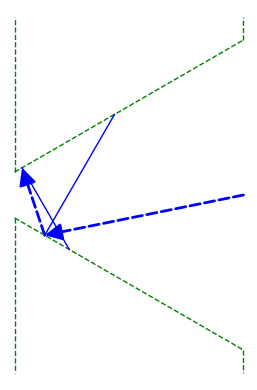

intersection_point_down Point2D(461591778199043/1000000000000000, -73300027479787/200000000000000)
traj_ray.angle_between(wedge_segment_down) 0.206009378859816
down_normal_angle 1/3*pi
ray_normal 0.461591778199043 -0.366500137398935 1.46159177819904 1.36555067016994
intersection_normal_point with wedge_segment_upper Point2D(1, -73300027479787/200000000000000 + 538408221800957*sqrt(3)/1000000000000000)
angle_ray_2 -0.200000000000001


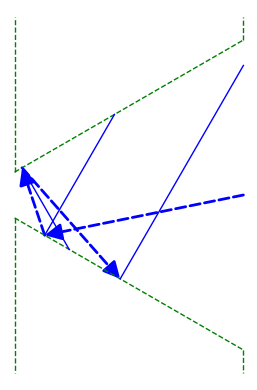

intersection_point_in Point2D(1, (-1016025403784438078811991908123*sqrt(162848610687922142162505142090025527208877906337603790074306238906935247510601943245774539749322193344822476239918311863124295008608039000000000000000*sqrt(3) + 310530524939107579468933664403694126207238923465594784483478462063209610313881305094431510097676103258497288047936176662257179063518024296272198505121)/1000000000000000 - 117320508075688711285377634493*sqrt(488545832063766426487515426270076581626633719012811370222918716720805742531805829737323619247966580034467428719754935589372885025824117000000000000000*sqrt(3) + 931591574817322738406800993211082378621716770396784353450435386189628830941643915283294530293028309775491864143808529986771537190554072888816595515363)/200000000000000 - 73300027479787*sqrt(-156046258091161663756727177091123600217079226585266203885662210331381974907058980862623299000000000000000*sqrt(3)*sqrt(16284861068792214216250514209002552720887790633760379007430623890693524751060194324577453

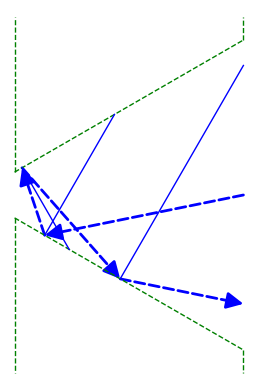

0

In [6]:
integrand (alpha=pi/6, y = 0, ang = pi/2+pi/2+0.2)

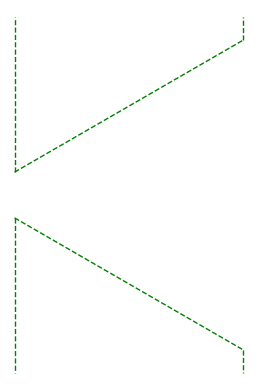

intersection_point_down Point2D(14115427318801/100000000000000, -45373864405591/250000000000000)
traj_ray.angle_between(wedge_segment_down) 1.16666666666667
down_normal_angle 1/3*pi
ray_normal 0.141154273188010 -0.181495457622364 1.14115427318801 1.55055534994651
intersection_normal_point with wedge_segment_upper Point2D(146496074449489703365753598966/666666666666666598686313495031 + 90747728811181895320559896065*sqrt(3)/666666666666666598686313495031, 5239322565748304629480427530579628233622169*sqrt(3)/66666666666666659868631349503100000000000000 + 37811553671325757908284582436068153452881679/166666666666666649671578373757750000000000000)
angle_ray_2 1.30899693899575


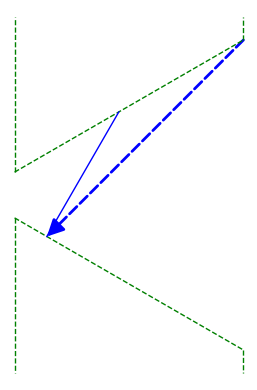

intersection_point_upper Point2D(256217782649107/1000000000000000, 247927405783631/1000000000000000)
traj_ray.angle_between(wedge_segment_upper) 0.500000000000000
upper_normal_angle 5/3*pi
ray_normal 0.256217782649107 0.247927405783631 1.25621778264911 -1.48412340178525
angle_ray_2 6.02138591938044


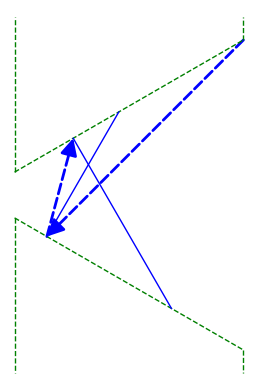

intersection_point_in Point2D(1, 247927405783631*(-9*sqrt(32075014954979167324694118336442282472545837381149430914778034341559585293000000000000000*sqrt(3) + 92592592592592598664352837100046452757550221051289481737427575069839426115247285868885209) + sqrt(3)*sqrt(32075014954979167324694118336442282472545837381149430914778034341559585293000000000000000*sqrt(3) + 92592592592592598664352837100046452757550221051289481737427575069839426115247285868885209) + 1520725942163690956902183047421046655778377391 + 943375672974064839156757437671953344221622609*sqrt(3))/(1000000000000000*(288675134594813058872712804874546655778377391*sqrt(3) + 654700538379251780284044632797406688443245218 + sqrt(3)*sqrt(32075014954979167324694118336442282472545837381149430914778034341559585293000000000000000*sqrt(3) + 92592592592592598664352837100046452757550221051289481737427575069839426115247285868885209))))
return plt, 0


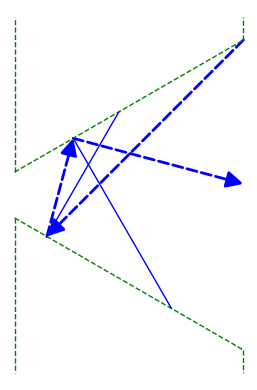

In [7]:
alpha_=pi/6
p1 = (d,  (r + d * tan(alpha_)).n())
p2 = (0, -r)
traj_ray_1 = Ray(p1, p2)
traj_ray_1 = Ray(p1, angle = pi+pi/4)
plt, n = draw_wedge(alpha_, traj_ray_1)
plt.show(aspect_ratio = 1, axes=False)

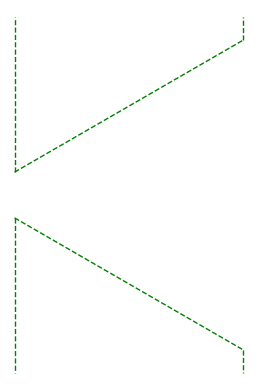

intersection_point_down Point2D(103349364905389/250000000000000, -338675134594813/1000000000000000)
traj_ray.angle_between(wedge_segment_down) 1.00000000000000
down_normal_angle 1/3*pi
ray_normal 0.413397459621556 -0.338675134594813 1.41339745962156 1.39337567297406
intersection_normal_point with wedge_segment_upper Point2D(1, -338675134594813/1000000000000000 + 146650635094611*sqrt(3)/250000000000000)
angle_ray_2 1.04719755119660


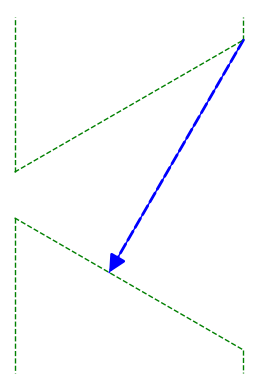

intersection_point_in Point2D(1, -338675134594813/1000000000000000 + 146650635094611*(-866025403784439 + 500000000000000*sqrt(3) + 3*sqrt(288675134594813000000000000000*sqrt(3) + 833333333333333401313686504969))/(250000000000000*(-1500000000000000 + 866025403784439*sqrt(3) + sqrt(3)*sqrt(288675134594813000000000000000*sqrt(3) + 833333333333333401313686504969))))
return plt, 0


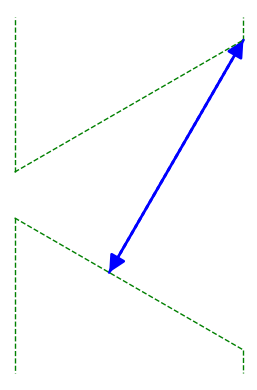

In [8]:
calc_float = True
traj_ray_1 = Ray(p1, angle = pi+pi/3)
plt, n = draw_wedge(alpha_, traj_ray_1)
plt.show(aspect_ratio = 1, axes=False)

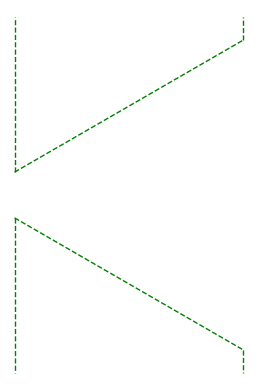

intersection_point_upper Point2D(334936490538903/5000000000000000, 138675134594813/1000000000000000)
traj_ray.angle_between(wedge_segment_upper) 1.83333333333333
upper_normal_angle 5/3*pi
ray_normal 0.0669872981077806 0.138675134594813 1.06698729810778 -1.59337567297406
angle_ray_2 3.92699081698724


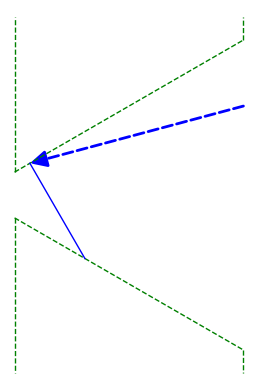

intersection_point_out Point2D(0, (-2531088913245537442865350679487 + 1004809471616709*sqrt(1255983064143707401313686504969 - 711324865405187000000000000000*sqrt(3)) + 693375672974065*sqrt(3)*sqrt(1255983064143707401313686504969 - 711324865405187000000000000000*sqrt(3)) + 961324865405187538675134594813*sqrt(3))/(5000000000000000*(-3232050807568878 + sqrt(3)*sqrt(1255983064143707401313686504969 - 711324865405187000000000000000*sqrt(3)) + 866025403784439*sqrt(3))))
return plt, 1


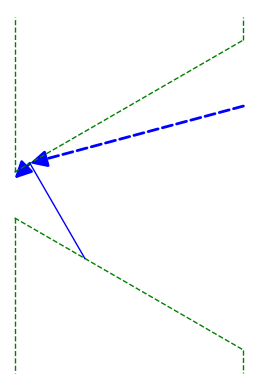

In [9]:
alpha_=pi/6
p1 = (d,  (r + d * tan(alpha_)/2))
traj_ray_1 = Ray(p1, angle = pi+pi/6/2)

plt, n = draw_wedge(alpha_, traj_ray_1)
plt.show(aspect_ratio = 1, axes=False)